# <font color = 'indianred'> **HW 3 Supervised Learning  (Total Points - 5)** </font>

You have to submit two files for this part of the  HW
1. FirstNameLastName_Hw3.ipynb (colab notebook)
2. FirstNameLastName_Hw3.pdf pdf file**

<font color = 'indianred'> **For Task1: You are also provided HW3_EDA_Template. You can folllow this template to complete Task1.**

# <font color = 'indianred'>**Import/Install the packages**

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [2]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q
  from google.colab import drive
  drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 70.1 MB/s eta 0:00:00
Mounted at /content/drive


In [3]:
import feature_engine
import sklearn

In [4]:
print(feature_engine.__version__)
print(sklearn.__version__)

1.6.1
1.3.0


In [5]:
# Import packages for data manipulation and mathematical operations
import pandas as pd  # For data manipulation using dataframes
import numpy as np  # For mathematical operations

# Import packages for data visualization
import matplotlib.pyplot as plt  # For basic plots
import seaborn as sns  # For more advanced plots
import scipy.stats as stats  # For statistical tests and transformations
import statsmodels.api as sm
# To display plots inline in Jupyter Notebooks
%matplotlib inline

# Import packages for saving and loading machine learning models
import joblib  # To save and load ML models

# Import packages for file and system operations
from pathlib import Path  # For OS-agnostic file paths
import sys  # For system-specific parameters and functions

# Import packages for data splitting and model evaluation
from sklearn.model_selection import train_test_split  # For data splitting
from sklearn.model_selection import StratifiedKFold  # For stratified cross-validation
from sklearn.model_selection import KFold  # For simple cross-validation
from sklearn.model_selection import StratifiedShuffleSplit

# Import packages for data preprocessing
from feature_engine.encoding import OneHotEncoder  # For one-hot encoding categorical variables
from feature_engine.encoding import RareLabelEncoder  # For encoding rare labels
from sklearn.preprocessing import StandardScaler  # For standardizing numerical variables

# Import packages for building pipelines
from sklearn.pipeline import Pipeline  # For creating pipelines

# Import packages for hyperparameter tuning
from sklearn.model_selection import GridSearchCV  # For grid search cross-validation

# Import packages for machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors classification

# Import packages for fetching datasets
from sklearn.datasets import fetch_openml  # To fetch datasets from OpenML

# Import packages for feature transformations
from feature_engine.transformation import LogTransformer  # For logarithmic transformations
from feature_engine.wrappers import SklearnTransformerWrapper  # To use scikit-learn transformers within feature-engine

# <font color = 'indianred'> **Specify Project Folder Location**

In [6]:
base_folder = Path('/content/drive/MyDrive/BUAN6341/HW3') # CHANGE TO LOCATION BASED ON YOUR GOOGLE DRIVE- chnage the path after MyDrive

In [7]:
# CHANGE TO LOCATION BASED ON YOUR GOOGLE DRIVE
save_model_folder = base_folder/'models/machine_learning' # CHANGE TO LOCATION WHERE YOU ARE PLANNING TO DSAVE MODELS
custom_function_folder = base_folder/'custom-functions' # CHANGE TO LOCATION WHERE YOU SAVED eda_pots.py
save_model_folder.mkdir(exist_ok=True, parents=True)

# <font color = 'indianred'> **Import Custom Functions from Python file**

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
sys.path.append(str(custom_function_folder))

In [10]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/BUAN6341/HW3/custom-functions']

In [11]:
from eda_plots import diagnostic_plots, plot_target_by_category

#  <font color = 'indianred'>**Task: Classification on the ‘credit-g’ dataset (10 points)**

<font color ='indianred'> **The goal is to classify people described by a set of attributes as good or bad credit risks.**</font>

# <font color = 'indianred'>**Download Data:**</font>
You can download the dataset using the commands below  and see it’s description at https://www.openml.org/d/31

### Attribute description from https://www.openml.org/d/31

1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)

In [12]:
from sklearn.datasets import fetch_openml

In [13]:
# Load data from  https://www.openml.org/d/31
X, y = fetch_openml("credit-g", version=1, as_frame=True, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [14]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [15]:
y.head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: category
Categories (2, object): ['bad', 'good']

# <font color = 'indianred'>**Task1 : EDA (9 Points)**</font>

Perfrom the initial EDA analysis and draw your conclusion. Based on EDA identify the preprocessing steps that we need to do.
You can use the code from preprocessing notebook in Lecture 4.

## <font color = 'indianred'>**Check Data (1.5 Points)**
Let's explore about the dataset by checking the shape(number of rows and columns), different column labels, duplicate values etc.

### <font color = 'indianred'>**Check few rows**

In [16]:
# CODE HERE
X.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,4.0,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,4.0,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,2.0,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,4.0,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,2.0,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes


In [17]:
y.head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: category
Categories (2, object): ['bad', 'good']

###  <font color = 'indianred'>**Check column names**

In [18]:
# CODE HERE
X.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

### <font color = 'indianred'>**Check data types of columns**

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

### <font color = 'indianred'>**Check for unique values**

In [20]:
# CODE HERE
X.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
dtype: int64

### <font color = 'indianred'>**Check summary statistics using describe function**

In [21]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


### <font color = 'indianred'>**Check for duplicate rows**

In [22]:
# CODE HERE
duplicates = X.duplicated()

print(duplicates.any())

print(X[duplicates])

False
Empty DataFrame
Columns: [checking_status, duration, credit_history, purpose, credit_amount, savings_status, employment, installment_commitment, personal_status, other_parties, residence_since, property_magnitude, age, other_payment_plans, housing, existing_credits, job, num_dependents, own_telephone, foreign_worker]
Index: []


## <font color = 'indianred'>**Quantifying Missing Data (1.5 Points)**

In [23]:
# CODE HERE

X.isnull().any()

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
dtype: bool

In [24]:
X.isnull().mean() * 100

checking_status           0.0
duration                  0.0
credit_history            0.0
purpose                   0.0
credit_amount             0.0
savings_status            0.0
employment                0.0
installment_commitment    0.0
personal_status           0.0
other_parties             0.0
residence_since           0.0
property_magnitude        0.0
age                       0.0
other_payment_plans       0.0
housing                   0.0
existing_credits          0.0
job                       0.0
num_dependents            0.0
own_telephone             0.0
foreign_worker            0.0
dtype: float64

## <font color = 'indianred'>**Identify numerical, categorical and discrete variables (1.5 Points)**


In [25]:
# CODE HERE
categorical = [var for var in X.columns if X[var].dtype.name == 'category']

discrete = [var for var in X.columns if X[var].dtype.name != 'category' and len(X[var].unique()) < 20]

continuous = [var for var in X.columns if X[var].dtype.name != 'category' and var not in discrete]

In [26]:
continuous

['duration', 'credit_amount', 'age']

In [27]:
categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [28]:
discrete

['installment_commitment',
 'residence_since',
 'existing_credits',
 'num_dependents']

## <font color = 'indianred'>**Check Variable Distributions (2 Points)**

### <font color = 'indianred'>**Categorical Varibles**




#### <font color = 'indianred'>**Frequency distribution of categorical variables and rare categories**

In [29]:
# CODE HERE
X[categorical].head()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes


In [30]:
checking_status_freq = 100 * X['checking_status'].value_counts(normalize = True)
print(checking_status_freq)

no checking    39.4
<0             27.4
0<=X<200       26.9
>=200           6.3
Name: checking_status, dtype: float64


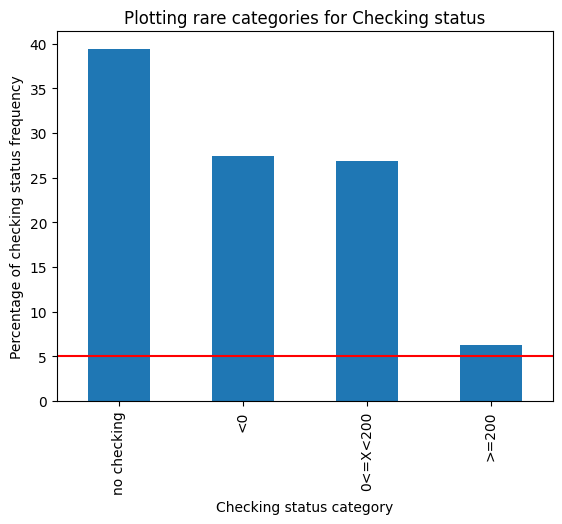

In [31]:
rare_cs_plot = checking_status_freq.sort_values(ascending=False).plot.bar()
rare_cs_plot.axhline(y=5, color='red')
rare_cs_plot.set_ylabel('Percentage of checking status frequency')
rare_cs_plot.set_xlabel('Checking status category')
rare_cs_plot.set_title('Plotting rare categories for Checking status')
plt.show()

In [32]:
def check_rare_categories(df, var):

    frequencies = 100 * df[var].value_counts(normalize=True)

    fig = frequencies.sort_values(ascending=False).plot.bar()

    fig.axhline(y=5, color='red')

    fig.set_ylabel('category percentage frequency')
    fig.set_xlabel(var)
    fig.set_title(f'Identifying Rare Categories for {var}')

    plt.show()

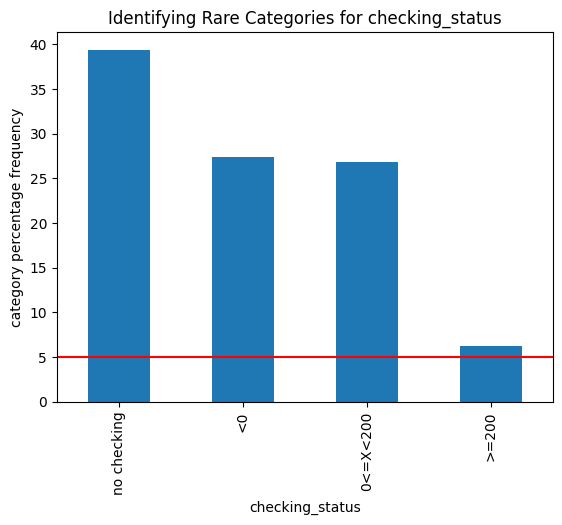

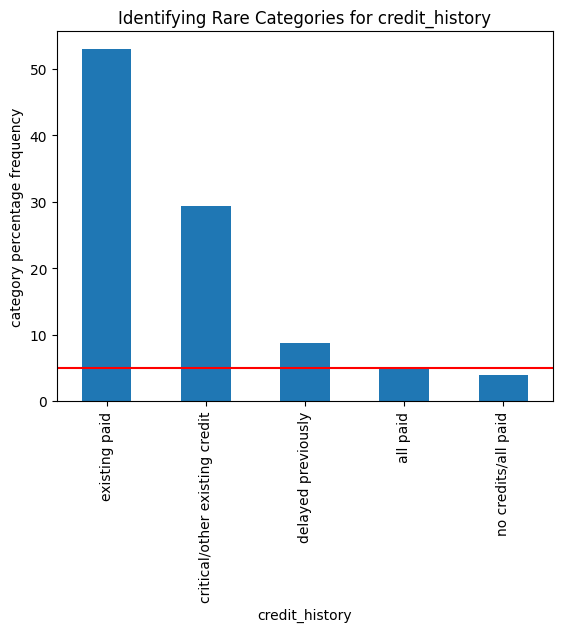

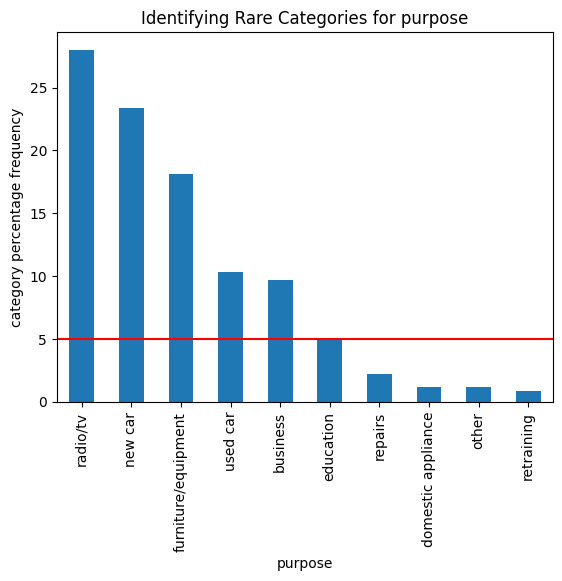

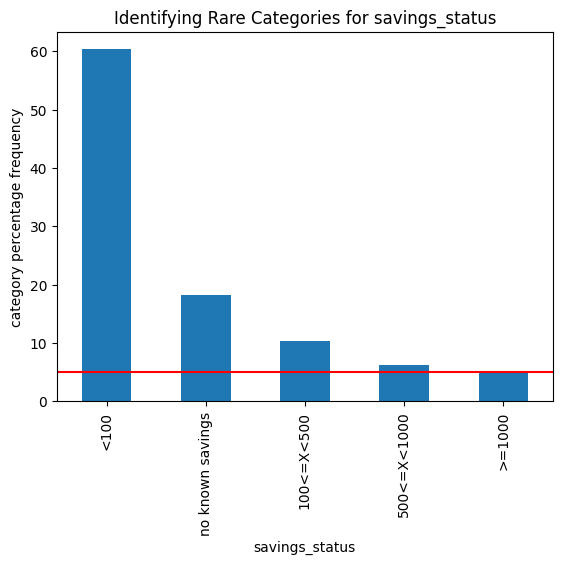

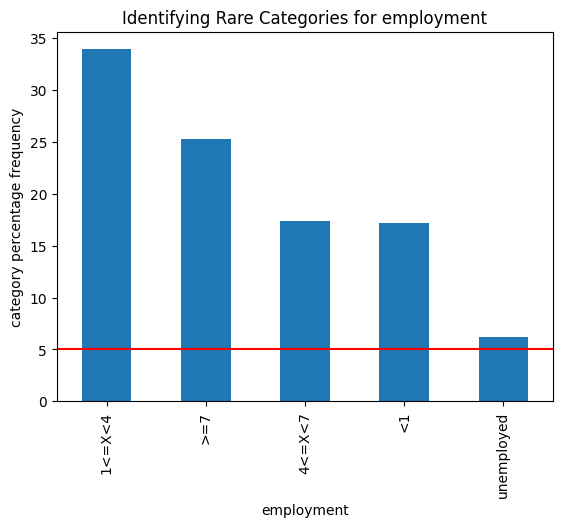

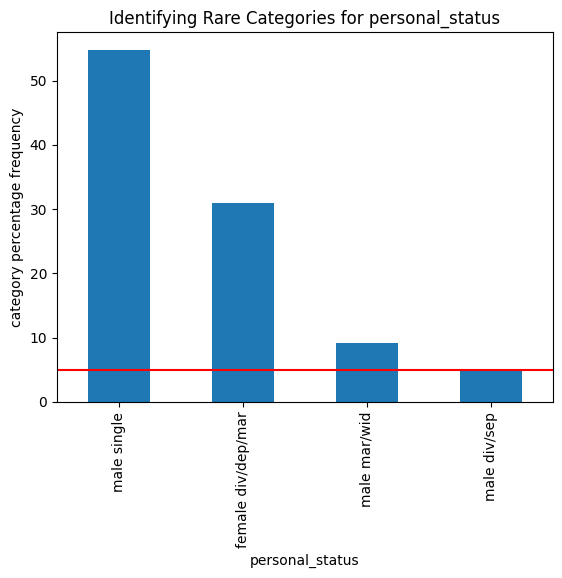

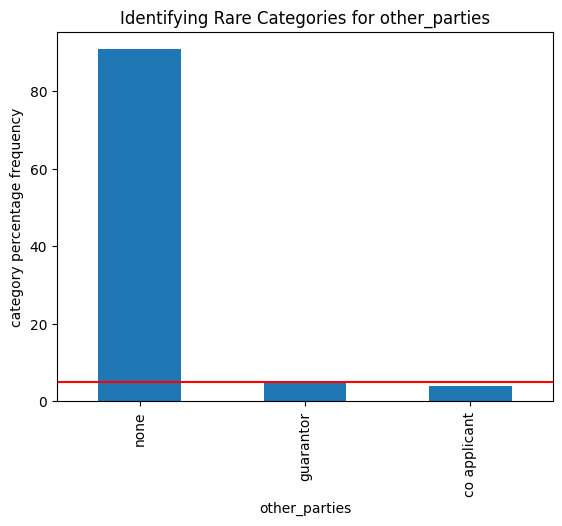

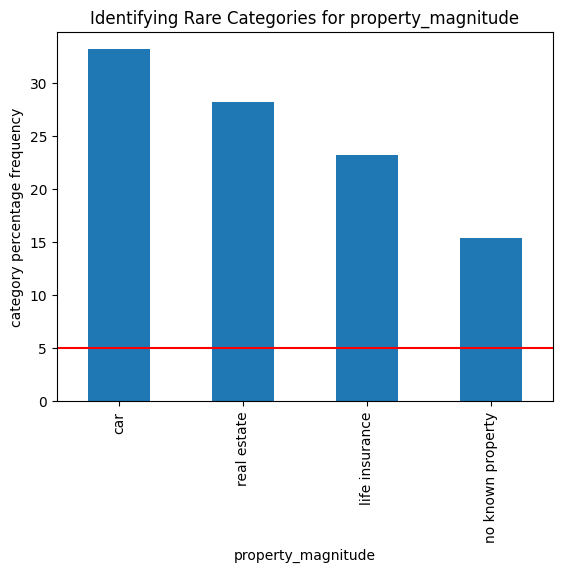

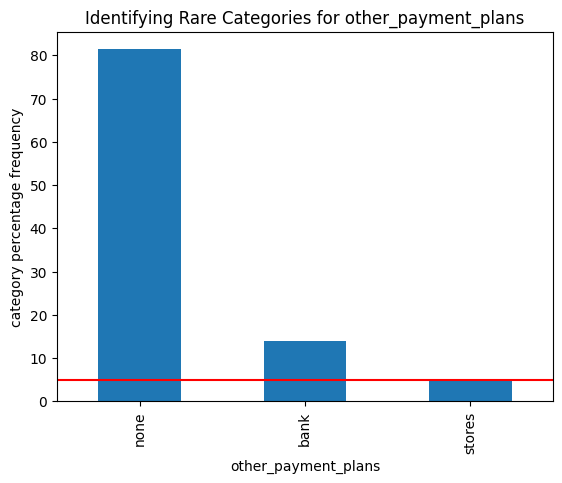

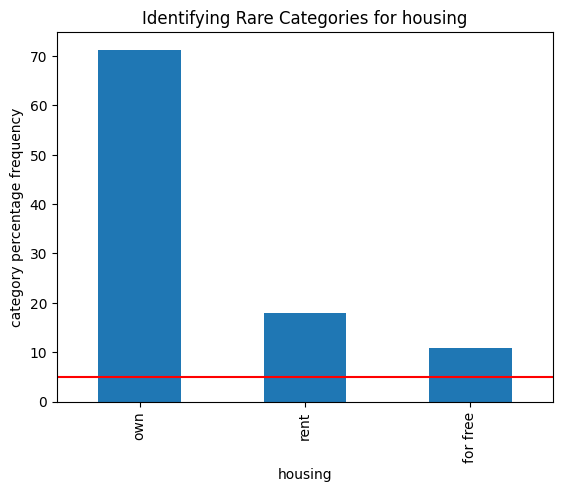

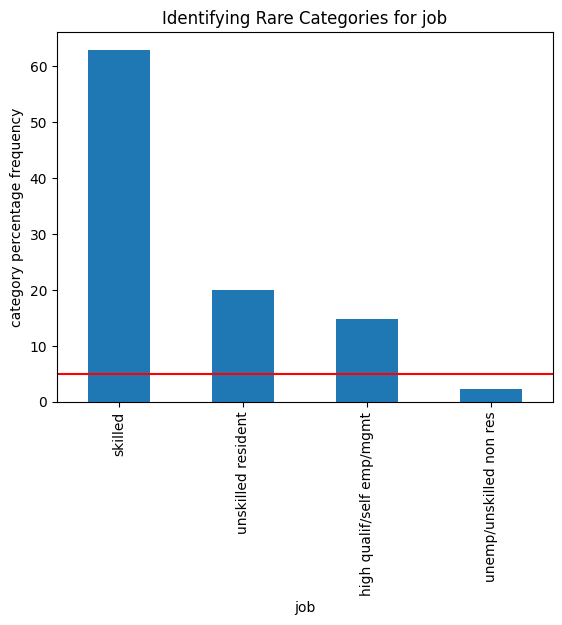

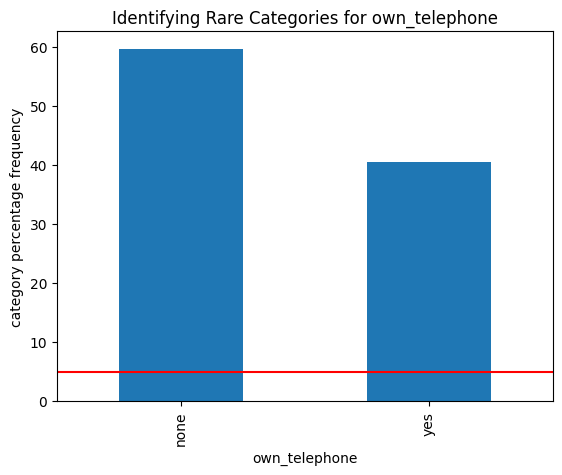

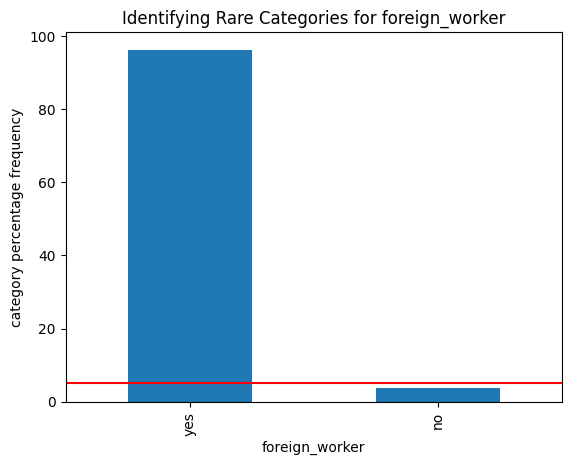

In [33]:
for var in categorical:
  check_rare_categories(X, var)

#### <font color = 'indianred'> **Check distribution of target variable**

In [34]:
# CODE HERE
print(y.value_counts())

good    700
bad     300
Name: class, dtype: int64


In [35]:
print(f"{100 * y.value_counts(normalize = True)}")

good    70.0
bad     30.0
Name: class, dtype: float64


### <font color = 'indianred'>**Distribution of continuous and discrete variables**



#### <font color = 'indianred'>**Distribution of continuous variables**

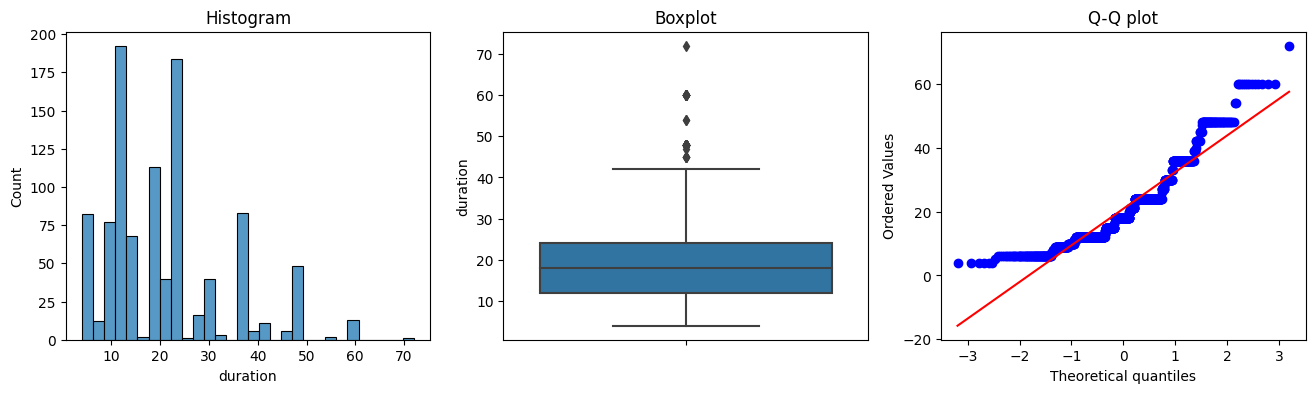

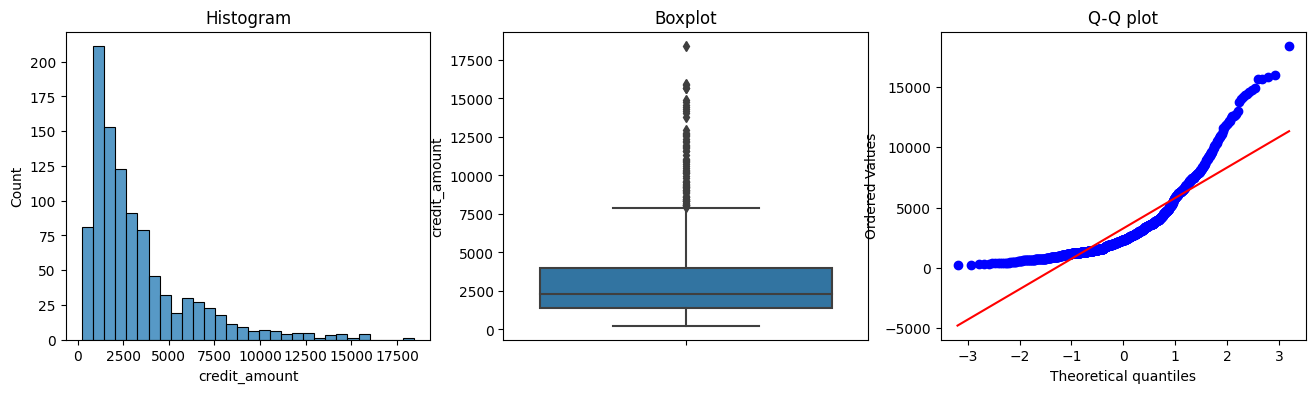

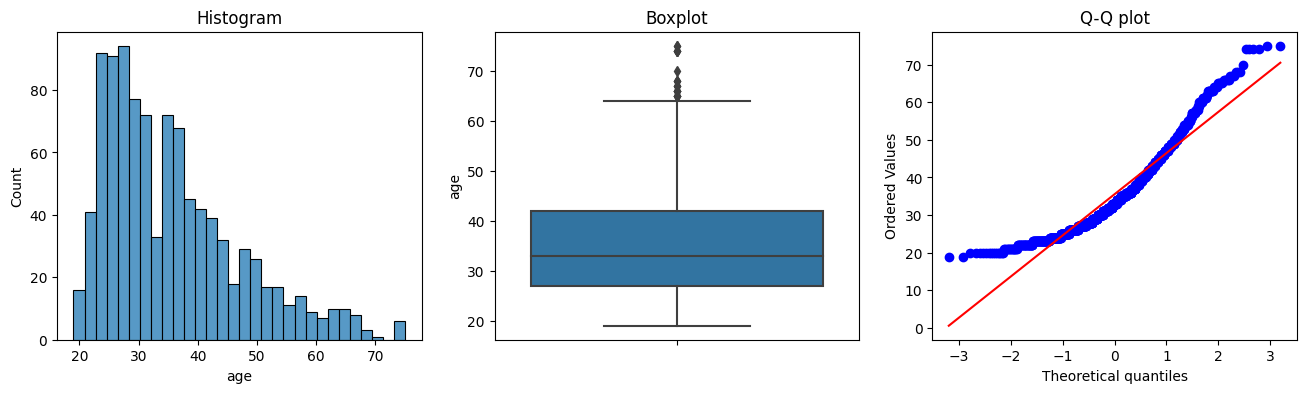

In [36]:
for var in continuous:
    diagnostic_plots(X, var)

#### <font color = 'indianred'>**Distribution of discrete variables**

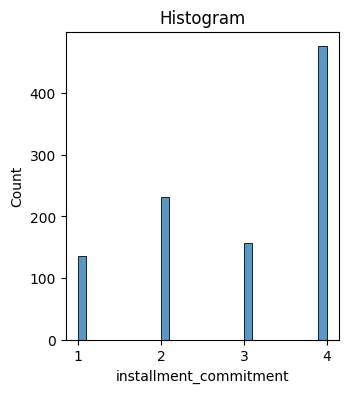

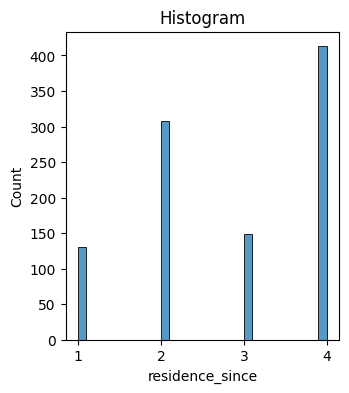

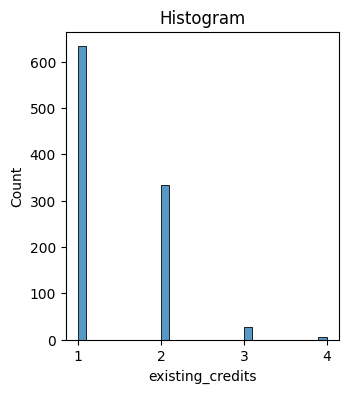

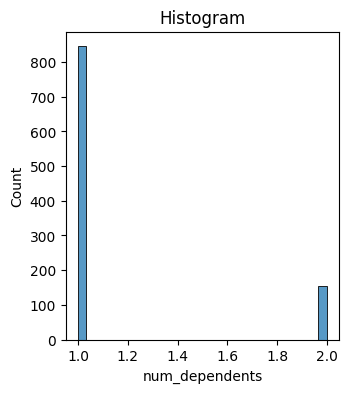

In [37]:
# CODE HERE
for var in discrete:
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 2)
  sns.histplot(X[var], bins = 30)
  plt.title('Histogram')

## <font color = 'indianred'>**Visualizing Relationships between variables (1 Point)**

### <font color = 'indianred'>**Correlation Matrix**

<Axes: >

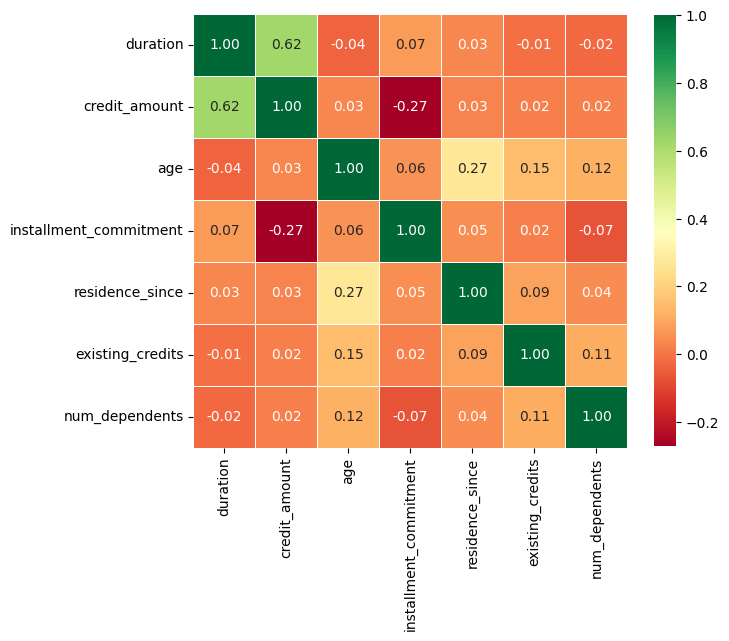

In [38]:
# CODE HERE
correlation_matrix = X[continuous + discrete].corr().round(2)
top_correlation_features = correlation_matrix.index
plt.figure(figsize=(7, 7))
sns.heatmap(X[top_correlation_features].corr(), annot = True, square = True, fmt = '.2f', cbar_kws = {"shrink": .80}, linewidths = .5, cmap = 'RdYlGn')

### <font color = 'indianred'>**Relationship between Target variable and categorical variables**

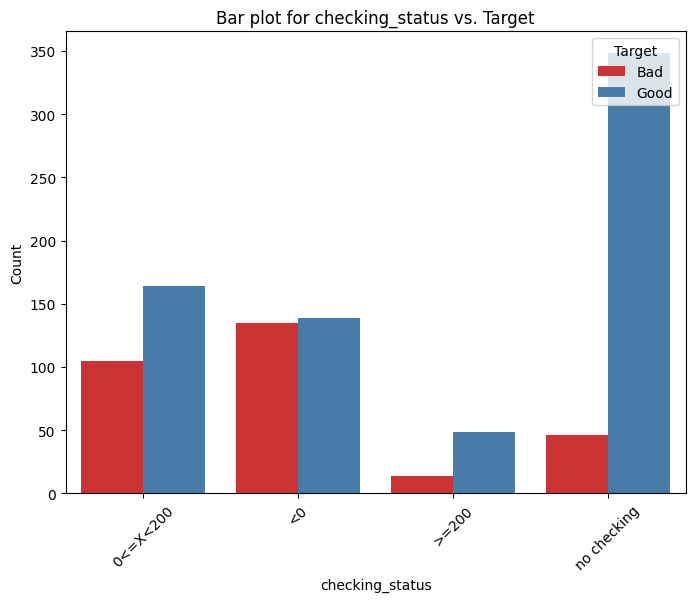

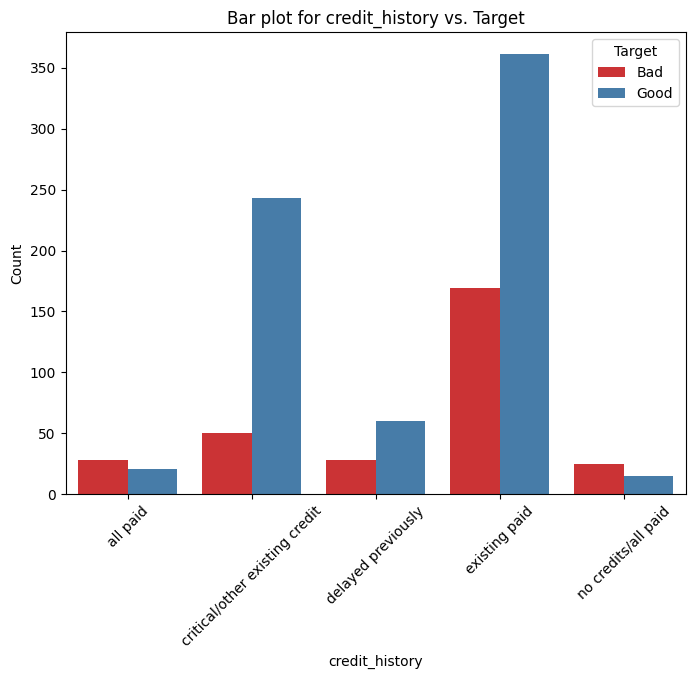

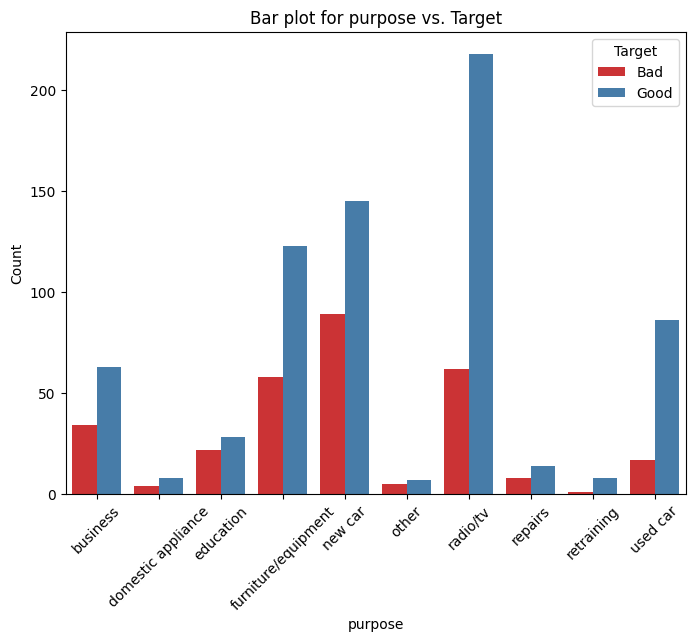

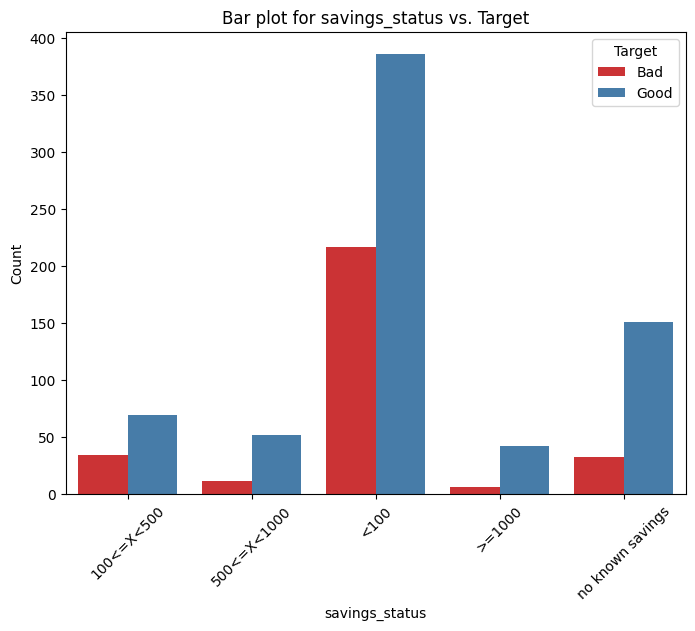

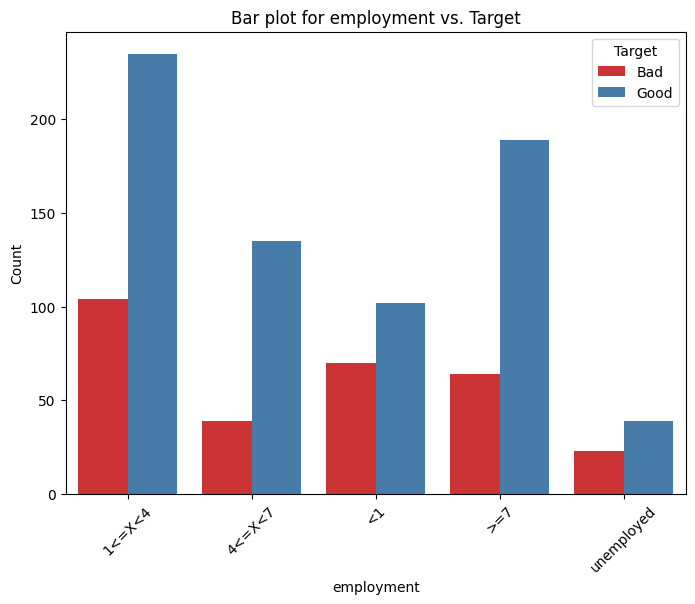

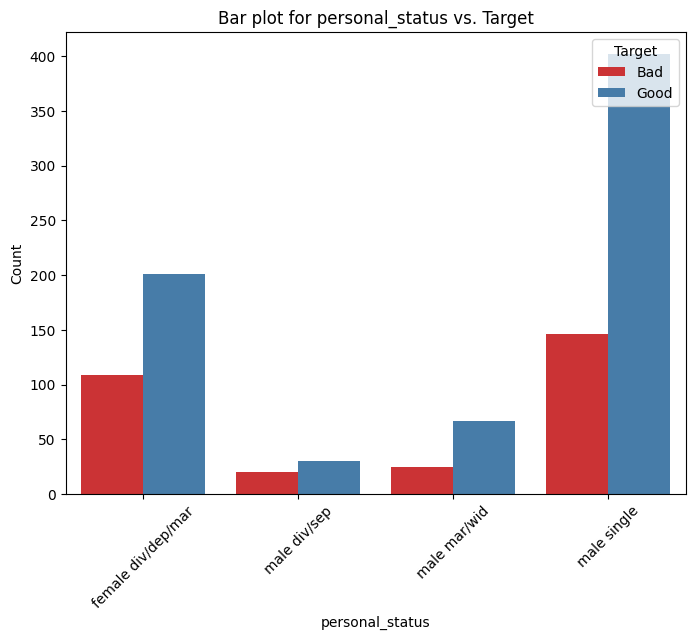

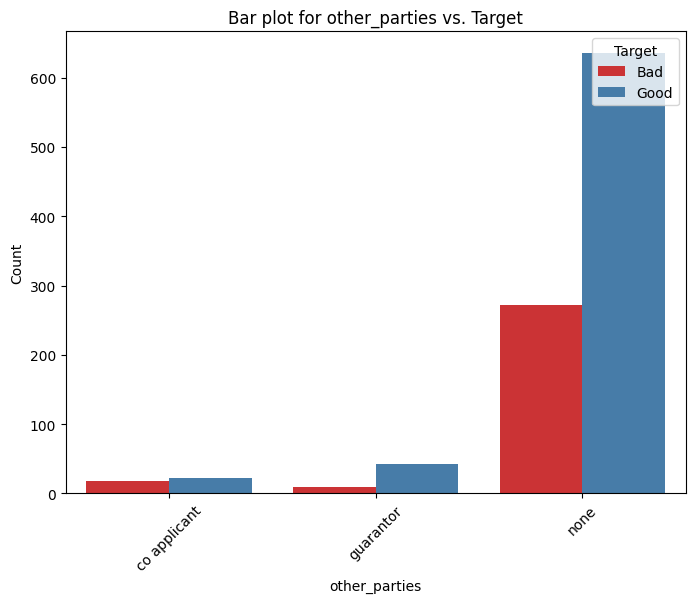

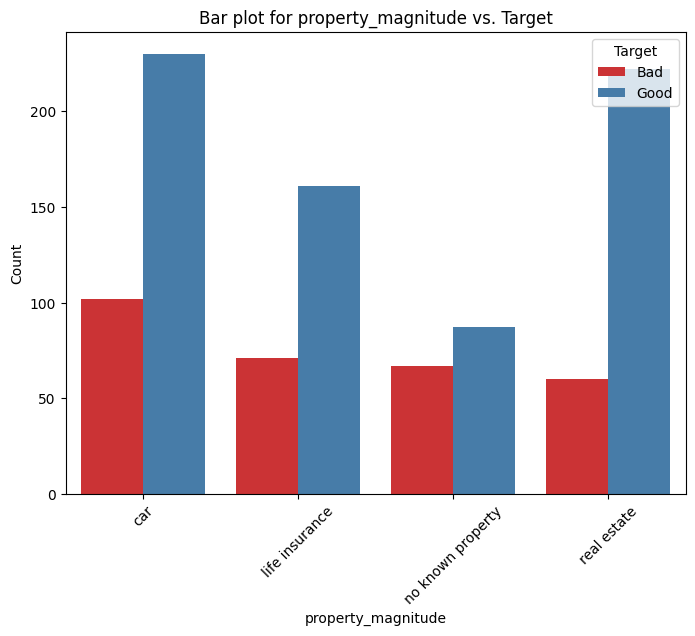

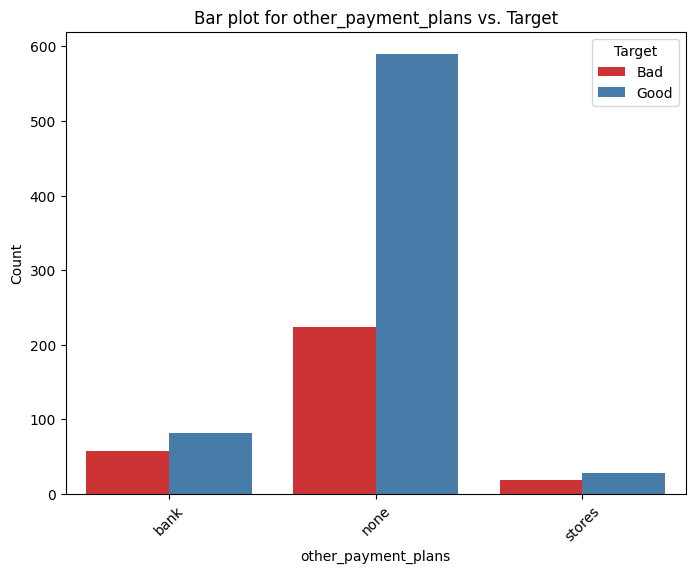

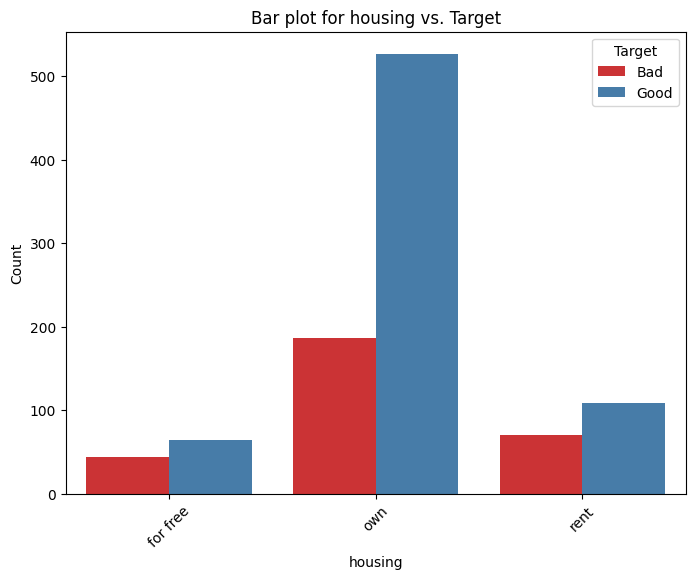

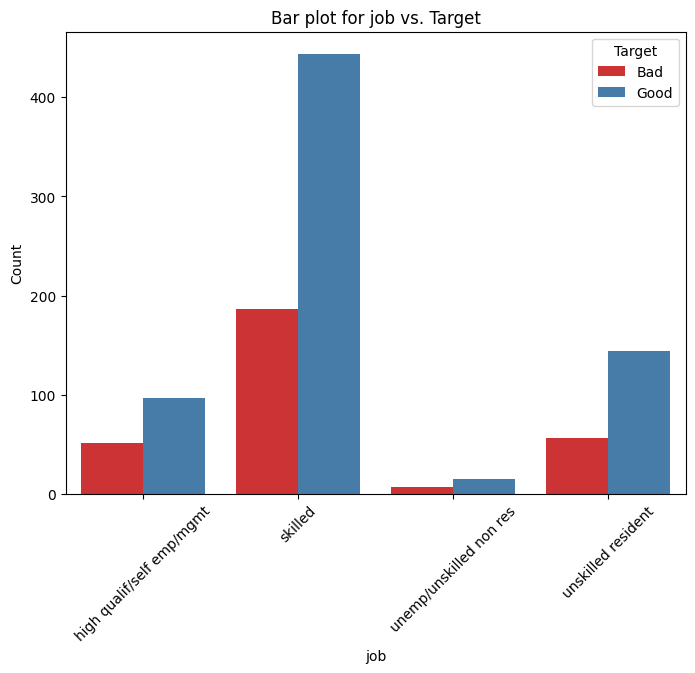

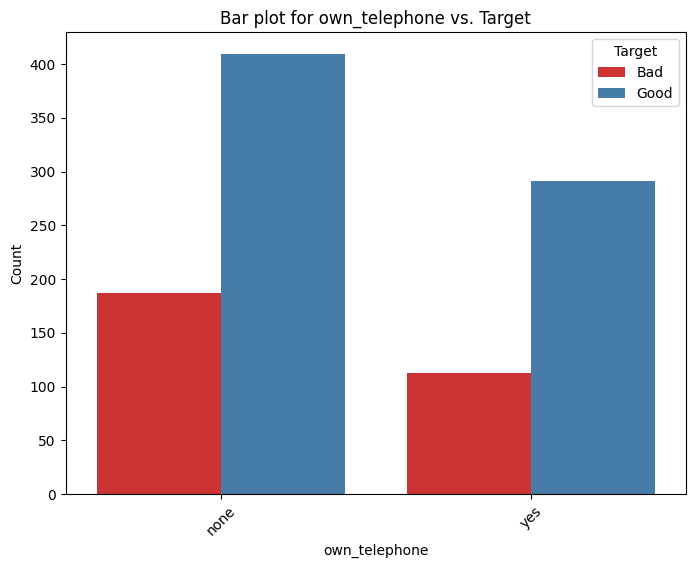

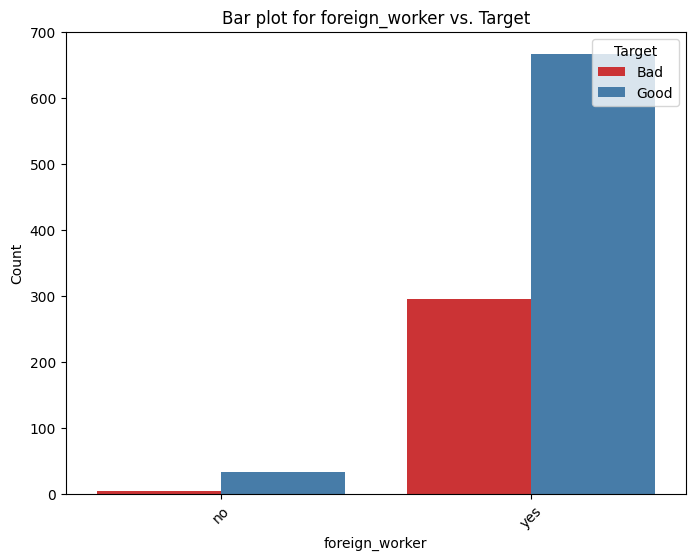

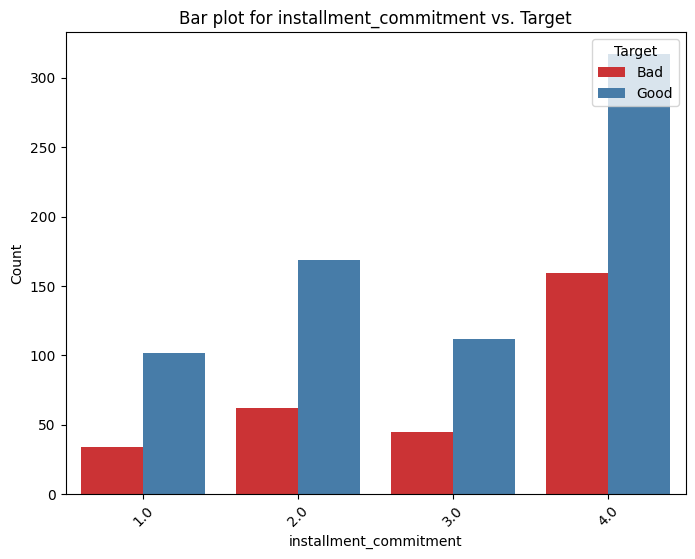

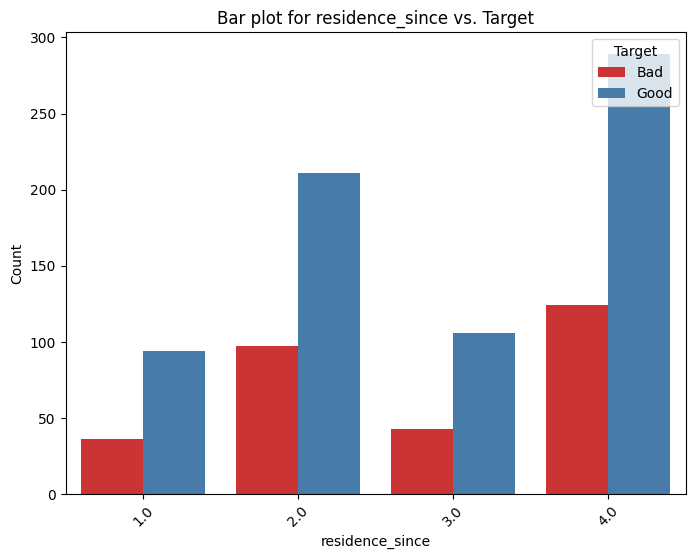

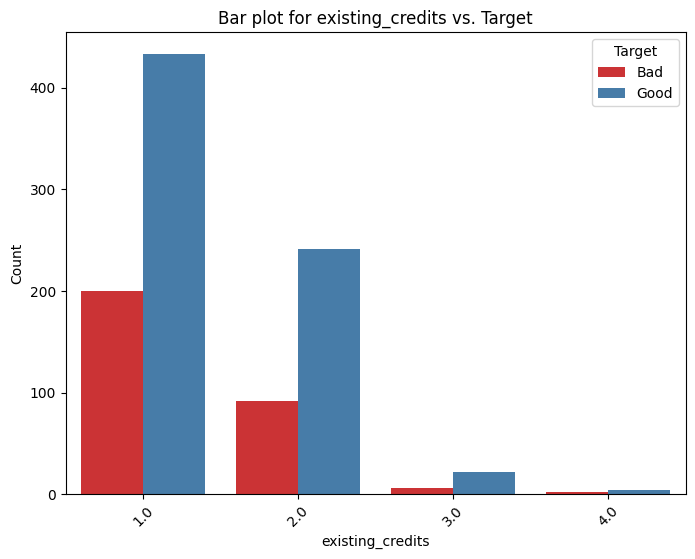

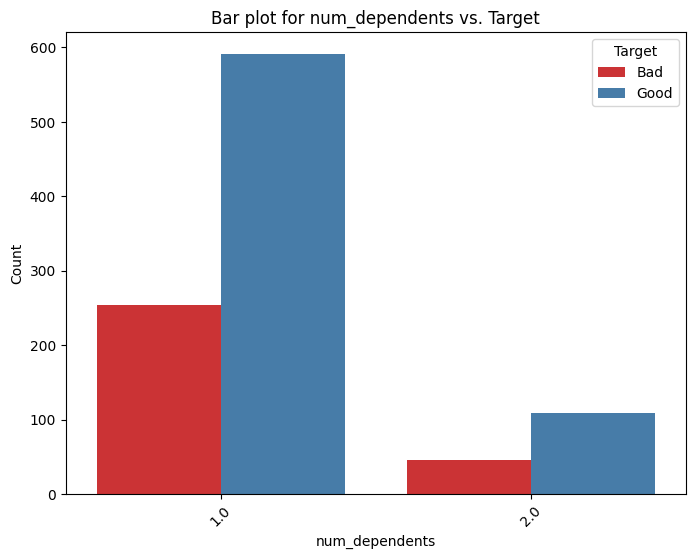

In [39]:
# CODE HERE
for var in categorical + discrete:
  plt.figure(figsize=(8, 6))
  sns.countplot(x = var, hue = y, data = X, palette = "Set1")
  plt.title(f"Bar plot for {var} vs. Target")
  plt.xlabel(var)
  plt.ylabel("Count")
  plt.legend(title = 'Target', loc = 'upper right', labels = ["Bad", "Good"])
  plt.xticks(rotation = 45)
  plt.show()

## <font color = 'indianred'>**Conclusion from EDA (1.5 Points)**</font>
## **Conclusions:**

1. From the above observations we can see that there are no null/missing values in the dataset, and therefore no need to use any kind of Imputation technique.
2. From the analysis conducted above we can conclude that we don't have any duplicates in our dataset.
3. We have a few variables with rare categories, credit_history, purpose, job, foreign_worker, in order to solve them, we can try and combine some of the rare categories in those respective variables, and make it one category, and by doing so we will have more values and there won’t be any rare categories.

4. We can see that, by analyzing the target variables, i.e, class variable, we have a class imbalance problem, where 70% of the data is labelled as ‘good’, and 30% of the data is labelled as ‘bad’. In order to solve this problem we can either upsample or downsample the dataset, or use different evaluation metrics, and use Stratified K-Fold, or Stratied Shuffle and Split as cross validation strategies.

5. Our continuous variables,’duration’, ‘credit_amount’, and ‘age’, don’t have a normal distribution, all three of them have a skewed distribution. We can use transformation of solve this issue.

6. Also, our continuous variables, have a lots of outliers, as we can see from the boxplots we have plotted, we can use discretization technique to resolve these outliers.

7. From out heatmap or correlation matrix we can see that there is a strong positive correlation between duration and credit_amount. And, there is a strong negative correlation between installment_commitment and credit_amount. The correlation matters when you are trying to prove causality, it doesn’t matter much when you are trying to make prediction. However, in some cases there might be some overfitting and in order to solve multicollinearity and high correlation you can consider dropping the highly correlated variables or try and merge them into one.

8. We can see that, checking_status with no checking has a good credit risk, credit_history of existing paid has a good credit risk. Purpose of radio/tv has a high good credit risk. And someone with saving_status of <100 has a high good credit risk. Someone who is employed for more that 1 year and less than 4 years also has a good credit risk. A single male has a good credit risk. And someone with no other parties has a high good credit risk. Also, someone with no other payment plans has high good credit risk. Also, someone with an own house has a high good credit. Someone who is skilled also have a good credit standing. And some with just 1 dependent has a good credit risk. And someone with less existing credits has a good credit. Finally, someone who is a resident_since 4 years has high chance of good credit.






# <font color = 'indianred'>**Task2: Preprocessing (2 Points)**
Split data into training and test set. In this HW, we will only do one type of preprocessing - (1) Encode categorical variables (your choice of encoder). You can use sklearn or feature-engine. Encode categorical variables in both Train and Test data.


In [40]:
# before doing any data cleaning step we need to first split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [41]:
# Importing One Hot encoder from feature engine, use drop last = True
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables = categorical, drop_last = True)

In [42]:
# fit_transform on train
X_train_fe = encoder.fit_transform(X_train)

In [43]:
# only transform on test
X_test_fe = encoder.transform(X_test)

In [44]:
X_train_fe.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_no checking,checking_status_<0,checking_status_0<=X<200,...,property_magnitude_no known property,other_payment_plans_none,other_payment_plans_bank,housing_rent,housing_own,job_unskilled resident,job_skilled,job_high qualif/self emp/mgmt,own_telephone_none,foreign_worker_yes
82,18.0,1568.0,3.0,4.0,24.0,1.0,1.0,1,0,0,...,0,1,0,1,0,1,0,0,1,1
991,15.0,1569.0,4.0,4.0,34.0,1.0,2.0,1,0,0,...,0,0,1,0,1,1,0,0,1,1
789,40.0,5998.0,4.0,3.0,27.0,1.0,1.0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
894,18.0,1169.0,4.0,3.0,29.0,2.0,1.0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
398,12.0,1223.0,1.0,1.0,46.0,2.0,1.0,0,0,1,...,0,1,0,1,0,0,1,0,1,1


In [46]:
X_test_fe.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_no checking,checking_status_<0,checking_status_0<=X<200,...,property_magnitude_no known property,other_payment_plans_none,other_payment_plans_bank,housing_rent,housing_own,job_unskilled resident,job_skilled,job_high qualif/self emp/mgmt,own_telephone_none,foreign_worker_yes
521,18.0,3190.0,2.0,2.0,24.0,1.0,1.0,0,1,0,...,0,1,0,0,1,0,1,0,1,1
737,18.0,4380.0,3.0,4.0,35.0,1.0,2.0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
740,24.0,2325.0,2.0,3.0,32.0,1.0,1.0,0,1,0,...,0,0,1,0,1,0,1,0,1,1
660,12.0,1297.0,3.0,4.0,23.0,1.0,1.0,0,0,0,...,0,1,0,1,0,0,1,0,1,1
411,33.0,7253.0,3.0,2.0,35.0,2.0,1.0,1,0,0,...,0,1,0,0,1,0,0,1,0,1


#  <font color = 'indianred'>**Task3: Train KNN calsssifier using Train Data (2 points)**

You will use Gridserach to find the best value of number of neighbors. Remember we have to find the best value using cross validation error. Then use the score method to find accuracy on both test and train datasets.

###  <font color = 'indianred'>**Round 1**

In [47]:
#Instructions:
# 1. Convert Pandas DataFrame to NumPy arrays. The variables are named X_train_fe, y_train, X_test_fe, and y_test.
# Replace 'values' with the method to convert a DataFrame to a NumPy array.
X_train_fe_numpy = X_train_fe.to_numpy()
y_train_numpy  = y_train.to_numpy()
X_test_fe_numpy  = X_test_fe.to_numpy()
y_test_numpy  = y_test.to_numpy()

# 2. Create a dictionary for hyperparameter tuning. The hyperparameter to tune is 'n_neighbors'.
# The possible values are from 1 to 30 with a step of 4.
# Replace '# CODE HERE' with the dictionary.
param_grid = {'n_neighbors': np.arange(1, 31, 4)}

# 3. Initialize GridSearchCV with the kNN classifier and 5-fold cross-validation.
# Use 'return_train_score=True' to get the training score.
# Replace '# CODE HERE' with the initialization code.
grid = GridSearchCV(KNeighborsClassifier(), cv = 5, param_grid = param_grid, return_train_score = True)

# 4. Fit the GridSearchCV object to the training data.
# Replace '# CODE HERE' with the code to fit GridSearchCV to the training data.
grid.fit(X_train_fe_numpy, y_train_numpy)

# 5. Obtain the best mean cross-validation score.
# Replace '#CODE HERE' with the attribute that holds this value from the GridSearchCV object.
print(f"Best mean cross-validation score: {grid.best_score_}")

# 6. Obtain the optimal 'n_neighbors' parameter value.
# Replace 'CODE HERE' with the attribute that holds this value from the GridSearchCV object.
print(f"Optimal 'n_neighbors' value: {grid.best_params_}")

# 7. Evaluate and print the training set accuracy.
# Replace '# CODE HERE' with the code to get the training set accuracy using the best hyperparameters.
print(f"Training set accuracy: {grid.score(X_train_fe_numpy, y_train_numpy):.3f}")

# 8. Evaluate and print the test set accuracy.
# Replace '# CODE HERE' with the code to get the test set accuracy using the best hyperparameters.
print(f"Test set accuracy: {grid.score(X_test_fe_numpy, y_test_numpy):.3f}")

Best mean cross-validation score: 0.692
Optimal 'n_neighbors' value: {'n_neighbors': 21}
Training set accuracy: 0.713
Test set accuracy: 0.704


###  <font color = 'indianred'>**Round 2:**






In [48]:
# Implement k-Nearest Neighbors (kNN) classification with hyperparameter tuning via GridSearchCV.
# Define the hyperparameter grid for 'n_neighbors' based on your initial findings.
# If the best 'n_neighbors' value from the initial run is X, consider a range around X to refine your search.
# For example, if your initial best value was 25 with a step size of 4, you might consider a new range from 22 to 28 with a step size of 1.
param_grid = {'n_neighbors': np.arange(18, 25, 1)}


# Initialize GridSearchCV with kNN classifier, specifying 5-fold cross-validation.
# The option 'return_train_score=True' enables inspection of training scores.
grid = GridSearchCV(KNeighborsClassifier(), cv = 5, param_grid = param_grid, return_train_score = True)

# Fit the GridSearchCV model to the training data.
# Replace '# CODE HERE' with the appropriate code to fit the GridSearchCV object.
grid.fit(X_train_fe_numpy, y_train_numpy)

# Retrieve and display optimal performance metrics.
# 1. Replace '#CODE HERE' with code to obtain the best mean cross-validation score from the GridSearchCV object.
# 2. Replace '# CODE HERE' with code to get the optimal 'n_neighbors' parameter value from the GridSearchCV object.
print(f"Best mean cross-validation score: {grid.best_score_}")
print(f"Optimal 'n_neighbors' value: {grid.best_params_}")

# Evaluate the model on both training and test sets using the best hyperparameters.
# Replace '# CODE HERE' with code to obtain accuracy for the training and test sets.
print(f"Training set accuracy: {grid.score(X_train_fe_numpy, y_train_numpy):.3f}")
print(f"Test set accuracy: {grid.score(X_test_fe_numpy, y_test_numpy):.3f}")





Best mean cross-validation score: 0.692
Optimal 'n_neighbors' value: {'n_neighbors': 19}
Training set accuracy: 0.725
Test set accuracy: 0.692


#  <font color = 'indianred'>**Task4: Change the cross-validation strategy (2 Points)**


###  <font color = 'indianred'>**Round 1**

In [49]:
# CODE HERE
param_grid = {'n_neighbors': np.arange(18, 25, 1)}

folds = KFold(n_splits = 5, random_state = 42, shuffle = True)

grid = GridSearchCV(KNeighborsClassifier(), cv = folds, param_grid = param_grid, return_train_score = True)

grid.fit(X_train_fe_numpy, y_train_numpy)

print(f"Best mean cross-validation score: {grid.best_score_}")
print(f"Optimal 'n_neighbors' value: {grid.best_params_}")


print(f"Training set accuracy: {grid.score(X_train_fe_numpy, y_train_numpy):.3f}")
print(f"Test set accuracy: {grid.score(X_test_fe_numpy, y_test_numpy):.3f}")


Best mean cross-validation score: 0.6893333333333334
Optimal 'n_neighbors' value: {'n_neighbors': 21}
Training set accuracy: 0.713
Test set accuracy: 0.704


###  <font color = 'indianred'>**Round 2:**


In [50]:
# CODE HERE
param_grid = {'n_neighbors': np.arange(18, 25, 1)}

folds = StratifiedShuffleSplit(n_splits = 5, random_state = 42, test_size = 0.4)

grid = GridSearchCV(KNeighborsClassifier(), cv = folds, param_grid = param_grid, return_train_score = True)

grid.fit(X_train_fe_numpy, y_train_numpy)

print(f"Best mean cross-validation score: {grid.best_score_}")
print(f"Optimal 'n_neighbors' value: {grid.best_params_}")


print(f"Training set accuracy: {grid.score(X_train_fe_numpy, y_train_numpy):.3f}")
print(f"Test set accuracy: {grid.score(X_test_fe_numpy, y_test_numpy):.3f}")


Best mean cross-validation score: 0.692
Optimal 'n_neighbors' value: {'n_neighbors': 19}
Training set accuracy: 0.725
Test set accuracy: 0.692
